# Climate vs EV_sales

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np

## Parameters 

In [2]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales.csv'
CLIMATE_DATASET = '../Processed_Data/climate_state.csv'
INCOME_DATASET = '../Processed_Data/incomes.csv'

# Load Datasets
## Load the EV sales dataset

In [3]:
df_EV = pd.read_csv(EV_SALE_DATASET,index_col=[0]).set_index("State")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
State,,,,
California,73854,94873,153442,145020
New York,6043,10090,15752,14823
Washington,5363,7068,12650,12172
Florida,6255,6573,13705,15794
Texas,4510,5419,11764,5780


## Load the climate dataset

In [4]:
df_Climate = pd.read_csv(CLIMATE_DATASET,index_col=[0])
print(df_Climate.shape)
df_Climate.head()

(49, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Massachusetts,49.7,49.6,46.4,47.3,47.7,47.8,47.3,47.4,50.4,49.8,...,51.3,48.8,47.7,48.5,50.3,49.6,49.5,48.5,50.9,50.7
North Carolina,61.1,60.2,58.2,58.7,59.0,58.4,57.8,58.1,60.8,59.7,...,60.7,58.6,58.4,60.5,60.8,61.0,60.4,61.3,60.8,60.2
Arkansas,61.8,61.3,59.9,59.3,60.4,60.5,59.6,59.7,63.1,62.1,...,63.6,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.1,61.2
North Dakota,42.6,42.3,41.2,38.3,40.0,39.6,36.5,40.7,43.2,43.0,...,44.1,38.8,39.0,43.4,44.4,42.0,39.8,38.0,42.3,43.8
Kansas,55.5,55.7,54.2,51.9,54.9,53.9,53.1,53.7,56.3,56.0,...,58.2,53.7,53.7,56.3,57.2,56.5,54.6,53.8,55.6,56.1


## Load the income dataset

In [5]:
df_Income = pd.read_csv(INCOME_DATASET,index_col=[0]).sort_values('GeoName').set_index("GeoName")
print(df_Income.shape)
df_Income.head()

(51, 74)


,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,10467.9,10252.7,12141.1,13719.4,14571.1,14331.5,16687.0,17907.4,18931.3,20113.4,...,491754.4,790033.1,1185940.7,1629938.5,2175204.7,2680407.0,3251615.6,561796.4,4097666.7,10591485.7
Alaska,0.0,343.4,1834.8,2453.7,2598.4,2486.0,2633.0,2723.0,2688.8,2842.0,...,103757.3,172710.3,231480.8,299836.3,418046.7,593095.3,695672.9,95956.2,807784.7,2192509.1
Arizona,3738.2,3917.6,4731.7,5915.6,6359.8,6732.2,7652.7,8771.7,9488.8,10717.6,...,414098.9,784716.8,1197632.4,1967944.9,2999854.9,3653468.2,4894171.6,569427.7,4364393.0,13481460.5
Arkansas,6429.8,6002.5,6961.9,7638.7,7717.7,7672.4,8583.4,8753.5,9244.4,10108.6,...,280218.7,440516.1,644009.5,916271.4,1254655.3,1612672.7,2048814.3,321698.4,2281015.7,6264201.1
California,73098.0,76086.4,89729.5,104507.7,114912.5,120629.2,136485.1,150933.0,161009.6,179496.7,...,4474919.5,7767454.3,11280953.2,16209227.0,22363039.0,27437210.9,37870143.0,5844770.9,39732554.0,110884678.8


## Merge into one dataframe

In [6]:
df_climate_and_ev = pd.concat([df_Climate['2019'].rename('temp'), df_EV['2019'].rename('EV_sale')], axis = 1)
df_climate_and_ev = df_climate_and_ev.dropna()
print(df_climate_and_ev.shape)
df_climate_and_ev.head()

(49, 2)


,temp,EV_sale
State,,
Massachusetts,48.5,7858
North Carolina,61.3,5393
Arkansas,61.2,538
North Dakota,38.0,114
Kansas,53.8,847


In [7]:
highest_sale = df_climate_and_ev.sort_values(by='EV_sale',ascending=False).index[0]
highest_temp = df_climate_and_ev.sort_values(by='temp',ascending=False).index[0]
lowest_temp = df_climate_and_ev.sort_values(by='temp',ascending=True).index[0]
highest_sale, highest_temp, lowest_temp

('California', 'Florida', 'Alaska')

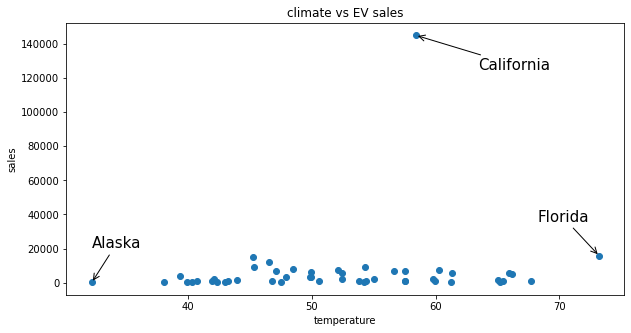

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])

plt.annotate(highest_sale, xy = (df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']] +(+5, -20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_temp, xy = (df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']] +(-5, +20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_temp, xy = (df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']] +(-0, +20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

In [9]:
df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']]

temp           58.4
EV_sale    145020.0
Name: California, dtype: float64

In [10]:
df_climate_and_ev = df_climate_and_ev.drop(highest_sale)
df_climate_and_ev = df_climate_and_ev.drop(highest_temp)
df_climate_and_ev = df_climate_and_ev.drop(lowest_temp)

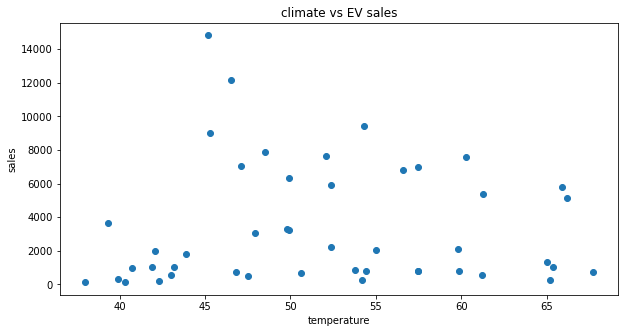

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

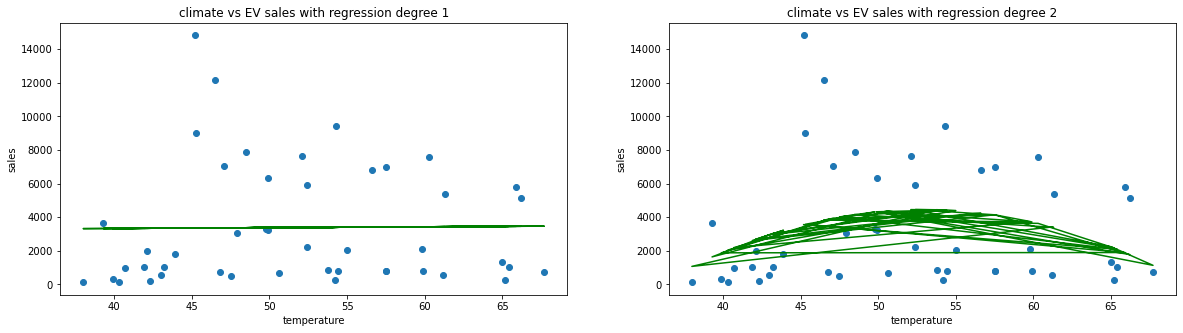

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("climate vs EV sales with regression degree 1")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'],1)
p = np.poly1d(parameter)
plt.scatter(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'])
plt.plot(df_climate_and_ev['temp'],p(df_climate_and_ev['temp']),color='g')

plt.subplot(1, 2, 2)
plt.title("climate vs EV sales with regression degree 2")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'],2)
p = np.poly1d(parameter)
plt.scatter(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'])
plt.plot(df_climate_and_ev['temp'],p(df_climate_and_ev['temp']),color='g')

plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_1.png', format='png')

In [13]:
df_climate_and_ev.head()

,temp,EV_sale
State,,
Massachusetts,48.5,7858
North Carolina,61.3,5393
Arkansas,61.2,538
North Dakota,38.0,114
Kansas,53.8,847


In [14]:
df_climate_and_ev["temp"] = pd.to_numeric(df_climate_and_ev["temp"],errors='coerce')

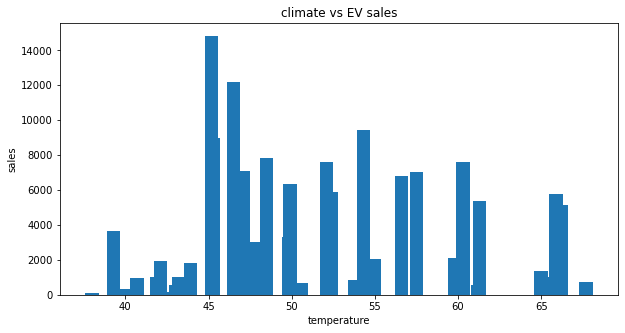

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_2.png', format='png')

In [16]:
col = ['Climate','EV_sale']
df = pd.DataFrame(columns = col)
df['Climate'] =  ['cold','cool','warm','hot']
for index, row in df.iterrows():
    if df.iloc[index,0] == 'cold':
        df.iloc[index,1] = df_climate_and_ev[(df_climate_and_ev['temp']<= 40)]['EV_sale'].sum()
    if df.iloc[index,0] == 'cool':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 40) & (df_climate_and_ev['temp']<50))]['EV_sale'].sum()
    if df.iloc[index,0] == 'warm':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 50) & (df_climate_and_ev['temp']<60))]['EV_sale'].sum()
    if df.iloc[index,0] == 'hot':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 60) & (df_climate_and_ev['temp']<=70))]['EV_sale'].sum()
df.head()

,Climate,EV_sale
0,cold,4072
1,cool,75796
2,warm,48134
3,hot,27775


In [17]:
df

,Climate,EV_sale
0,cold,4072
1,cool,75796
2,warm,48134
3,hot,27775


In [18]:
df = df.set_index('Climate')

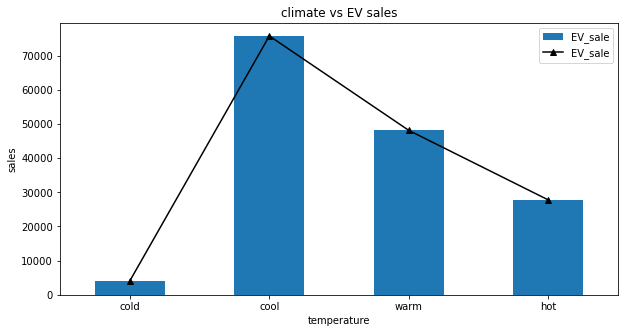

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(kind='bar',ax=ax)
df.plot(kind='line', marker='^',ax=ax, color='black')
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_3.png', format='png')